In [1]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import math
import pandas as pd
from  imageio import imread

In [2]:
import os

In [3]:
import cv2

In [4]:
Dog96 = imread('./TIFFtraining/Dog96.tif')

/opt/anaconda3/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:4275: UserWarning: 999 is not a valid EXTRASAMPLE
  warnings.warn(str(e))


In [5]:
Dog96.shape

(64, 64, 2)

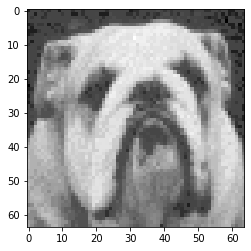

In [6]:
plt.imshow(Dog96[:,:,0],cmap='gray')

In [7]:
Dog96=np.array(Dog96[:,:,0])

In [8]:
dim = (64, 64)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

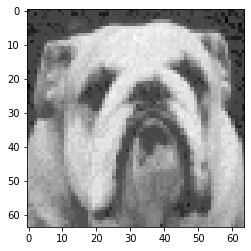

In [9]:
plt.imshow(to_rgb(Dog96))

In [10]:
X_list=[]
y_list=[]
for x in os.listdir("./TIFFtraining/"):
    if "Dog96" in x:
        continue
    else:
        vec=imread('./TIFFtraining/'+x)
        vec=np.array(vec)
        vec=to_rgb(vec)
        X_list.append(vec)
        if "Cat" in x:
            y_list.append(1)
        else:
            y_list.append(0)

In [11]:
len(X_list)

159

In [12]:
len(y_list)

159

In [13]:
X_list.append(to_rgb(Dog96))

In [14]:
y_list.append(0)

In [15]:
X=np.array(X_list)

In [16]:
#X=X.T

In [17]:
y=np.array(y_list)

In [18]:
y=y.reshape(160,1)

In [19]:
X.shape

(160, 64, 64, 3)

In [20]:
y.shape

(160, 1)

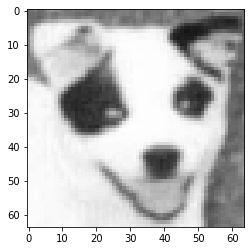

In [21]:
plt.imshow(X[155])

In [22]:
y[155]

array([0])

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.1.0'

In [29]:
X.shape,y.shape

((160, 64, 64, 3), (160, 1))

In [30]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [31]:
X,y=unison_shuffled_copies(X, y)

In [49]:
from keras import layers, models, optimizers
from keras.applications import VGG16
from keras.regularizers import l2


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [48]:
%time history = model.fit(X, y, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Train on 128 samples, validate on 32 samples
Epoch 1/10
128/128 [==============================] - 2s 14ms/step - loss: 34.2807 - acc: 0.4766 - val_loss: 22.9354 - val_acc: 0.4375
Epoch 2/10
128/128 [==============================] - 2s 13ms/step - loss: 31.3398 - acc: 0.4688 - val_loss: 20.9846 - val_acc: 0.4375
Epoch 3/10
128/128 [==============================] - 2s 13ms/step - loss: 25.6032 - acc: 0.4688 - val_loss: 19.6089 - val_acc: 0.4688
Epoch 4/10
128/128 [==============================] - 2s 14ms/step - loss: 21.5891 - acc: 0.4844 - val_loss: 18.3726 - val_acc: 0.5000
Epoch 5/10
128/128 [==============================] - 2s 13ms/step - loss: 24.6283 - acc: 0.4766 - val_loss: 17.2867 - val_acc: 0.5312
Epoch 6/10
128/128 [==============================] - 2s 13ms/step - loss: 20.2555 - acc: 0.5469 - val_loss: 16.4054 - val_acc: 0.5312
Epoch 7/10
128/128 [==============================] - 2s 14ms/step - loss: 23.8102 - acc: 0.5234 - val_loss: 15.4500 - val_acc: 0.5312
Epoch 8/10

In [31]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

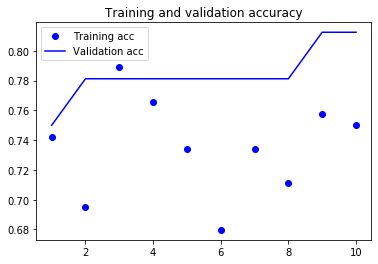

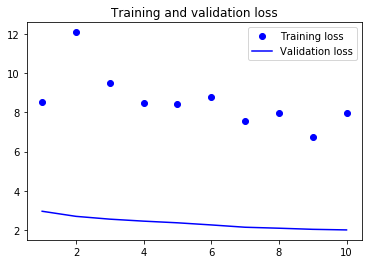

In [32]:
plot_accuracy_and_loss(history)

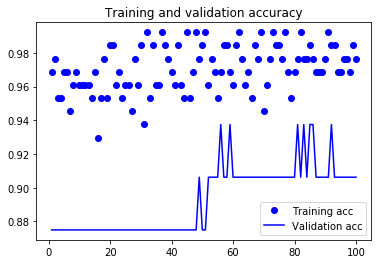

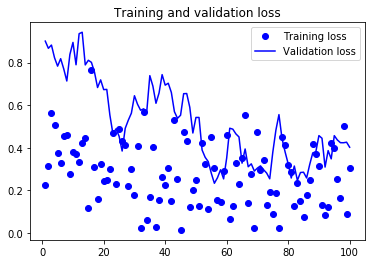

In [55]:
plot_accuracy_and_loss(history)